In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('HR_data.csv')
df.head()

,Unnamed: 0,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
0,0,77.965186,78.00,3.345290,73.23,83.37,22924.945,round_3,phase3,1,1,1,D1_1
1,1,70.981097,70.57,2.517879,67.12,78.22,21930.400,round_3,phase2,1,1,5,D1_1
2,2,73.371959,73.36,3.259569,67.88,80.22,21647.085,round_3,phase1,1,1,0,D1_1
3,3,78.916822,77.88,4.054595,72.32,84.92,25258.905,round_2,phase3,1,1,1,D1_1
4,4,77.322226,74.55,6.047603,70.52,90.15,23890.565,round_2,phase2,1,1,5,D1_1


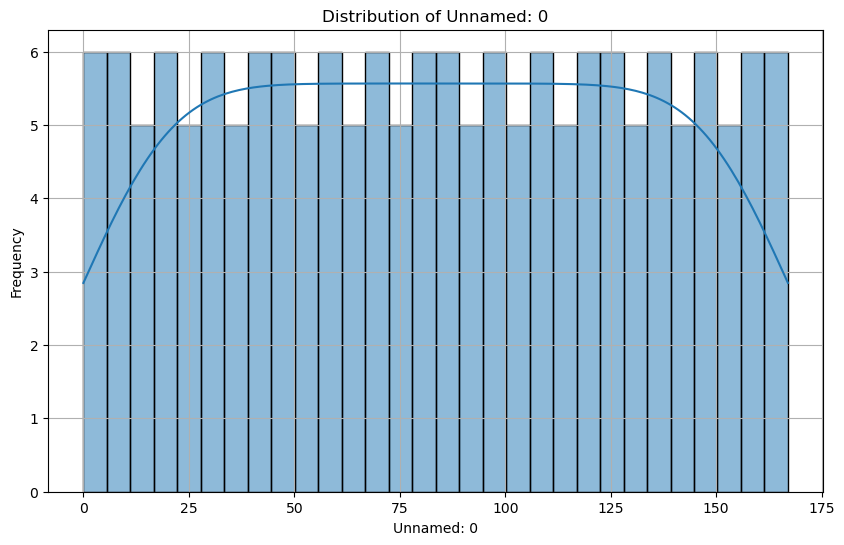

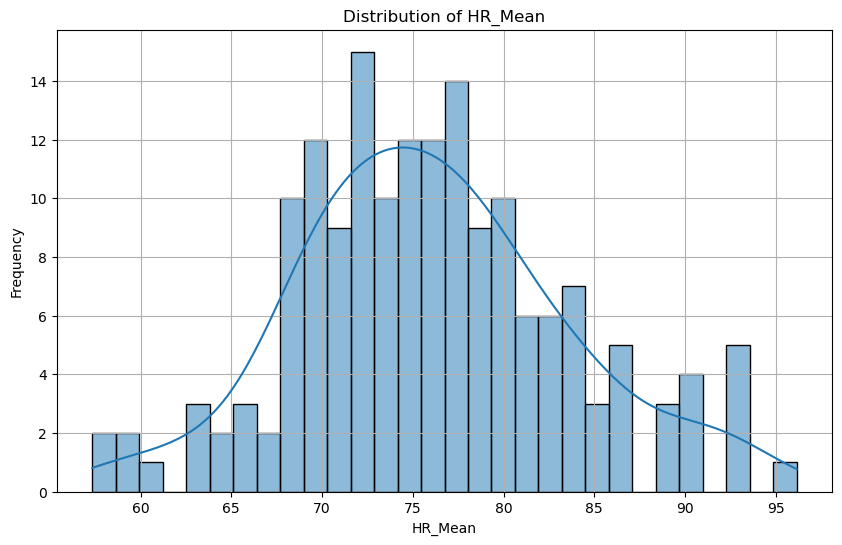

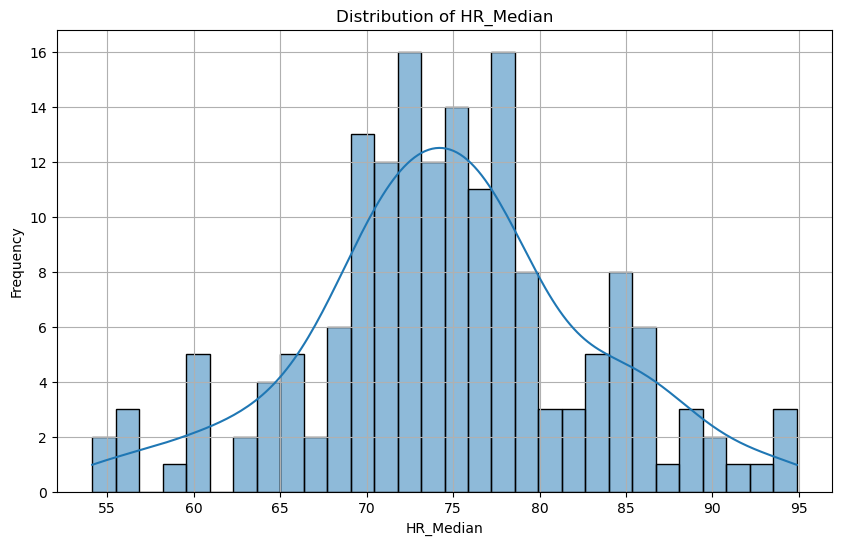

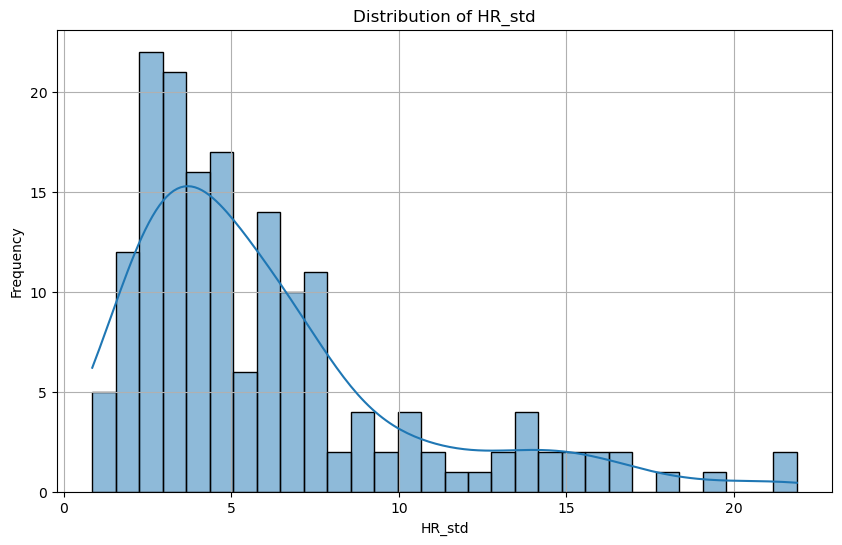

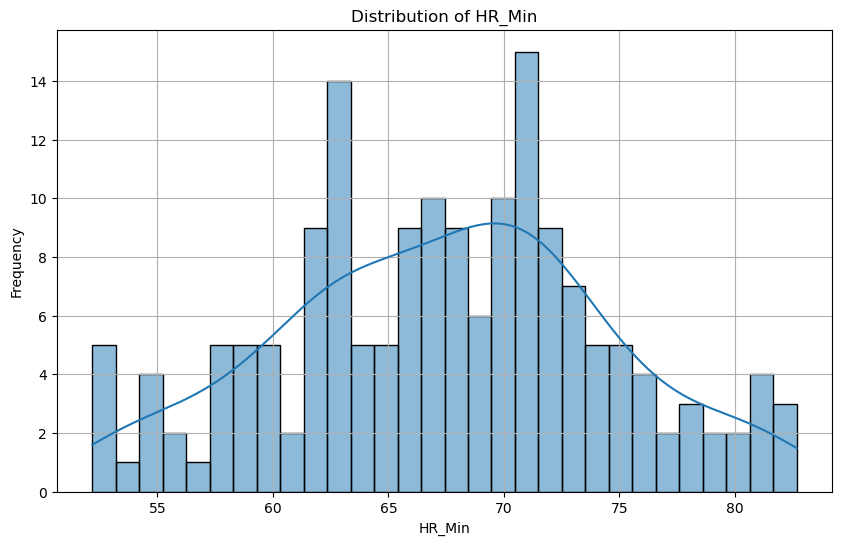

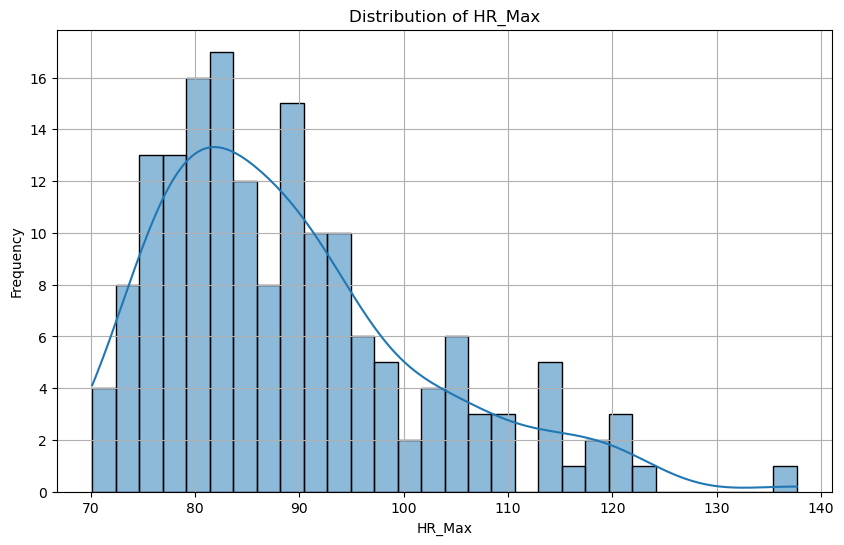

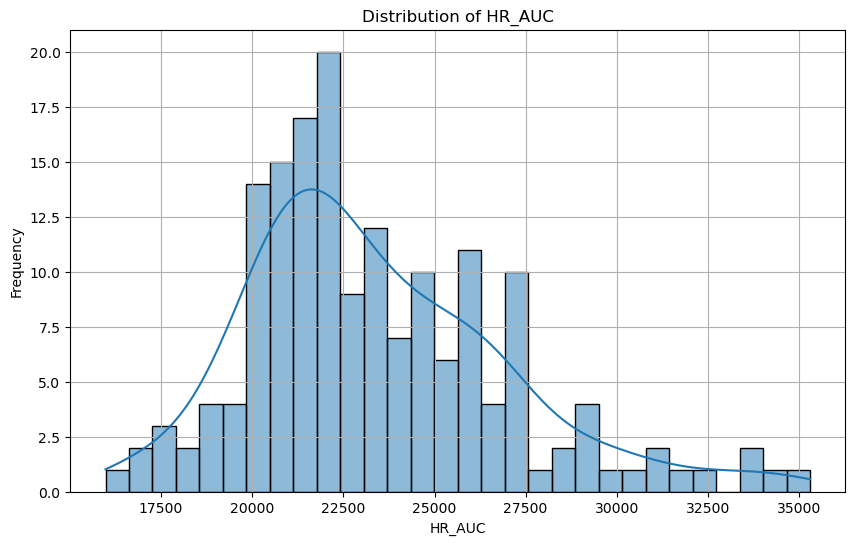

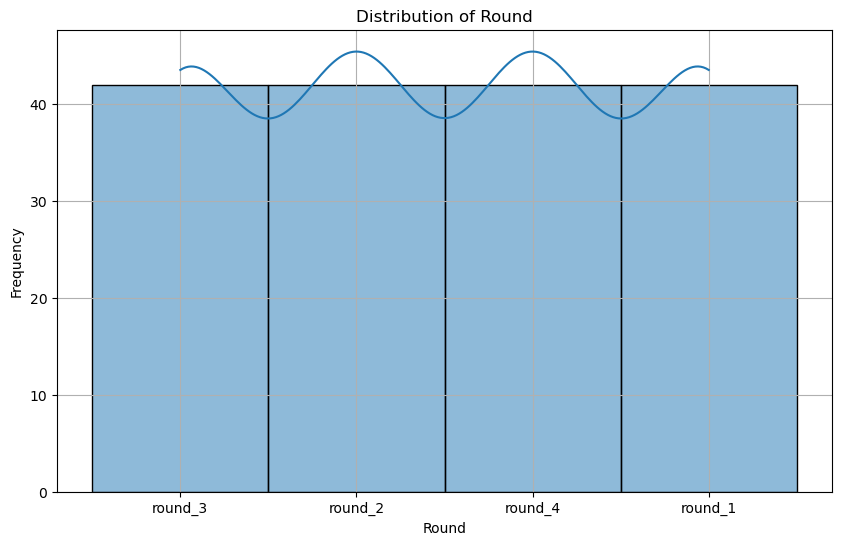

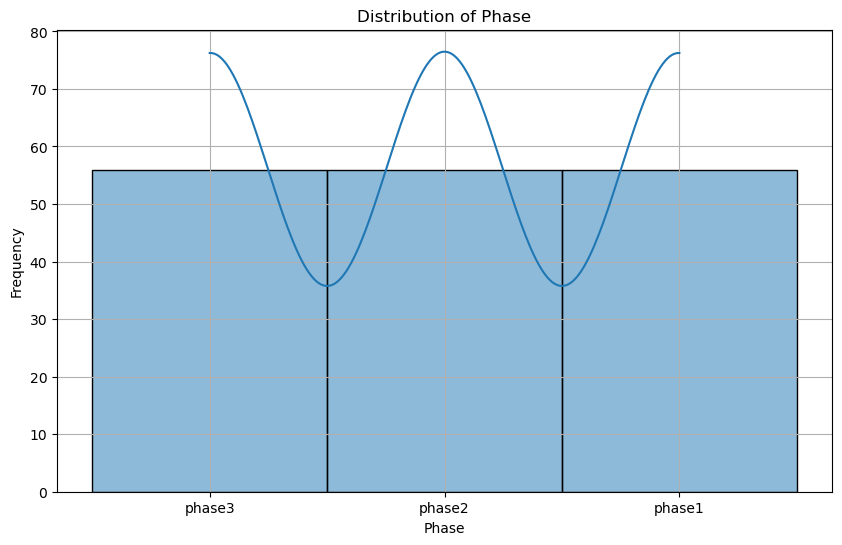

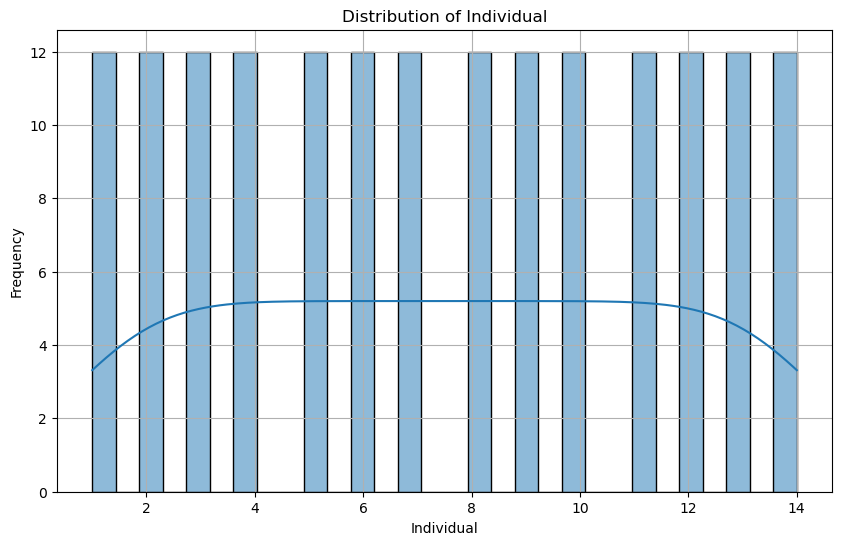

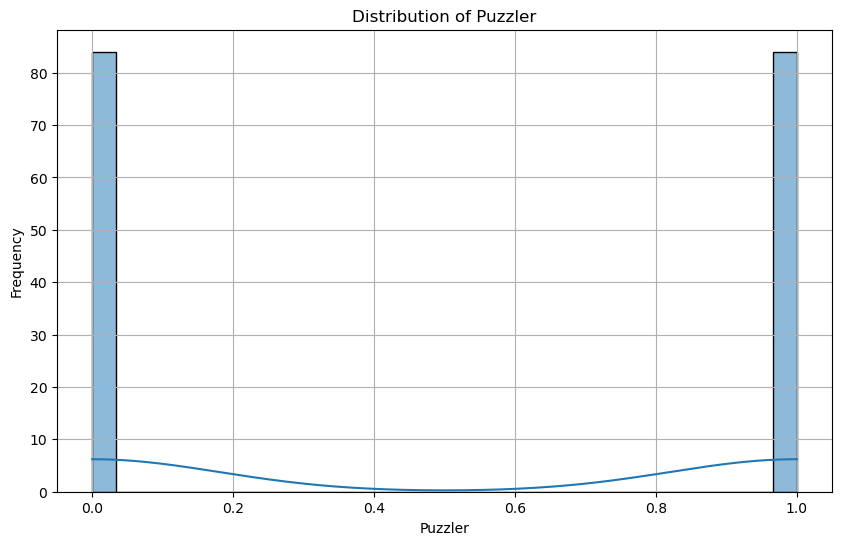

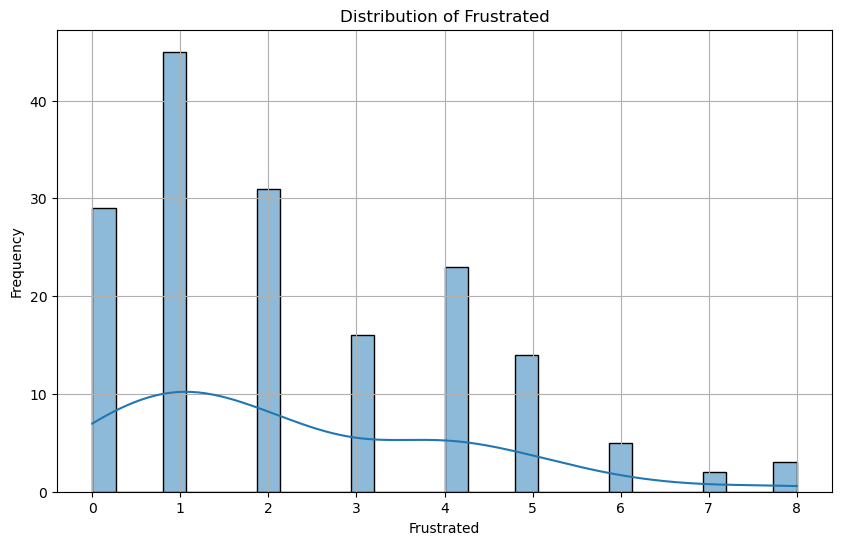

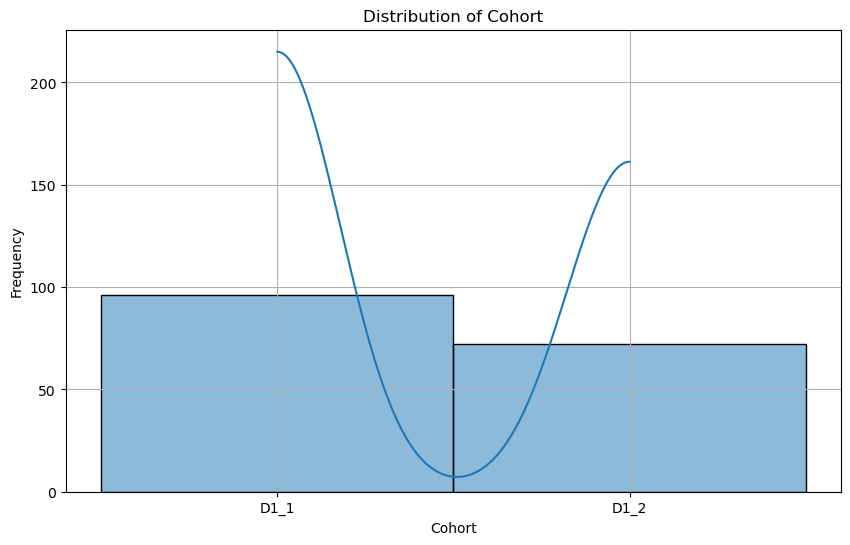

In [75]:
for col in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid()
    plt.show()

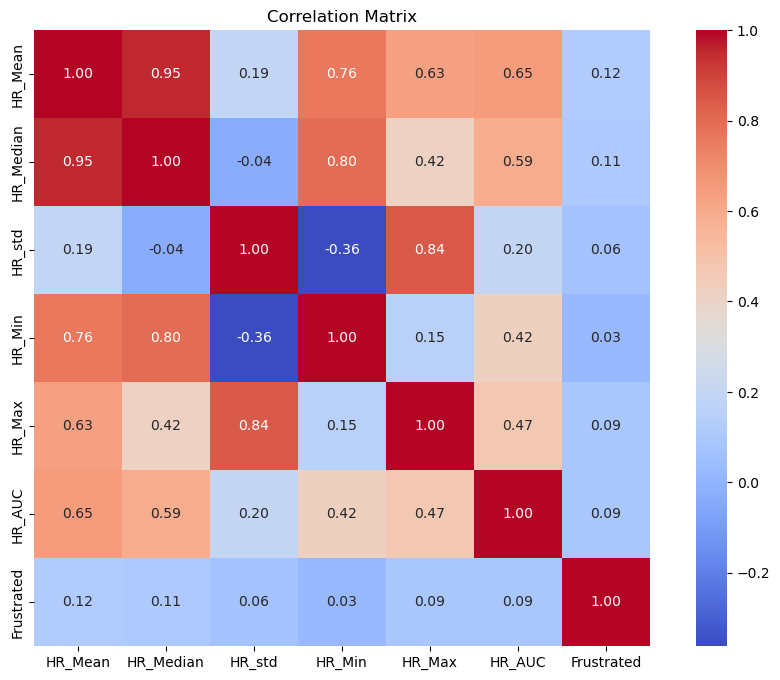

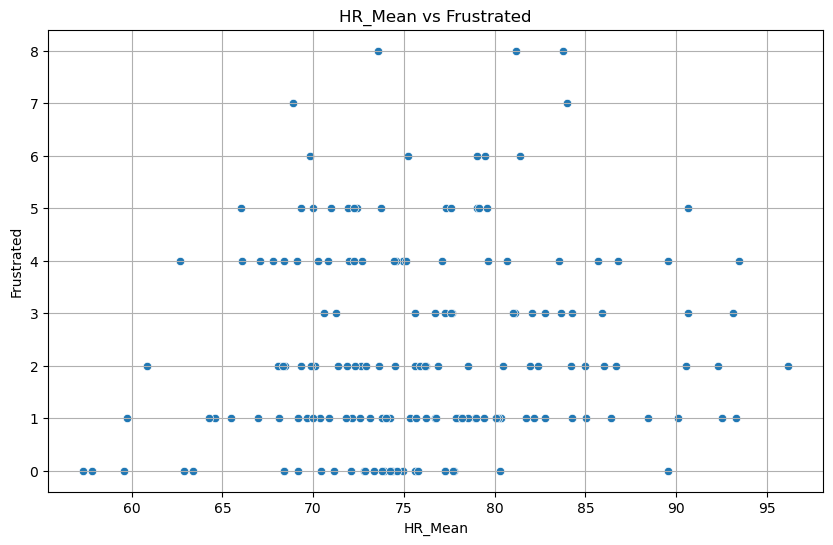

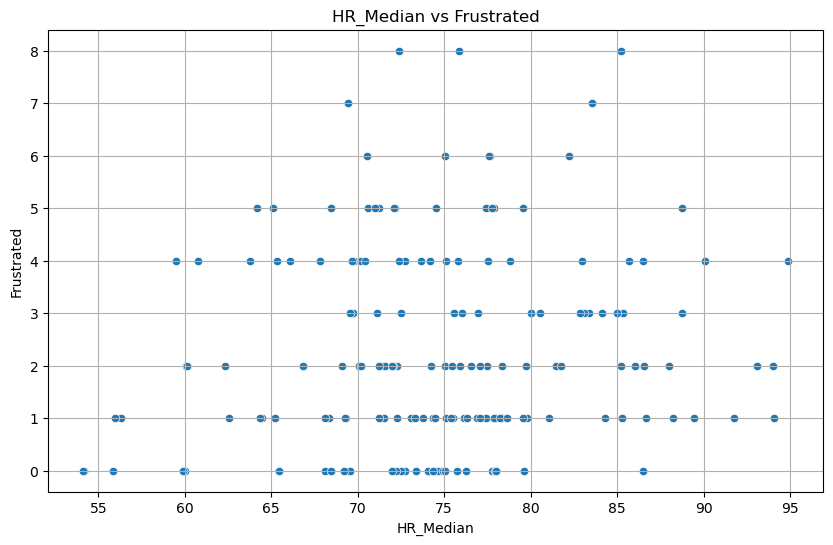

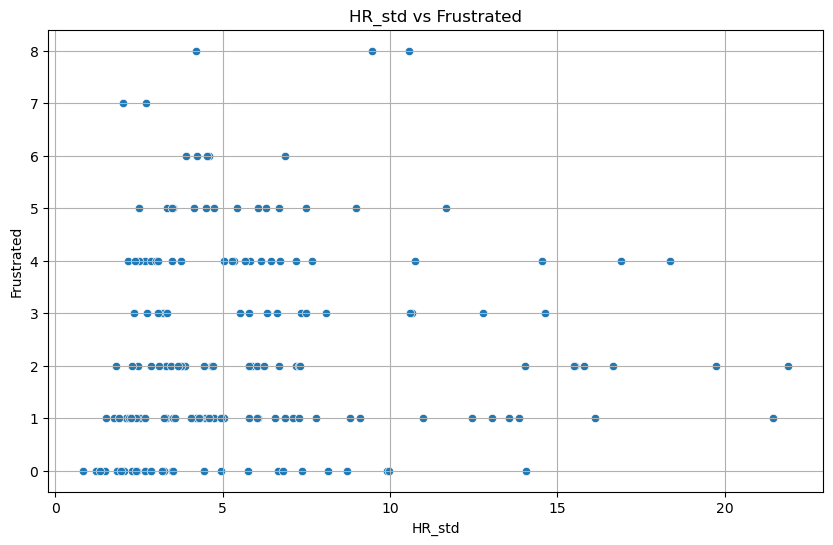

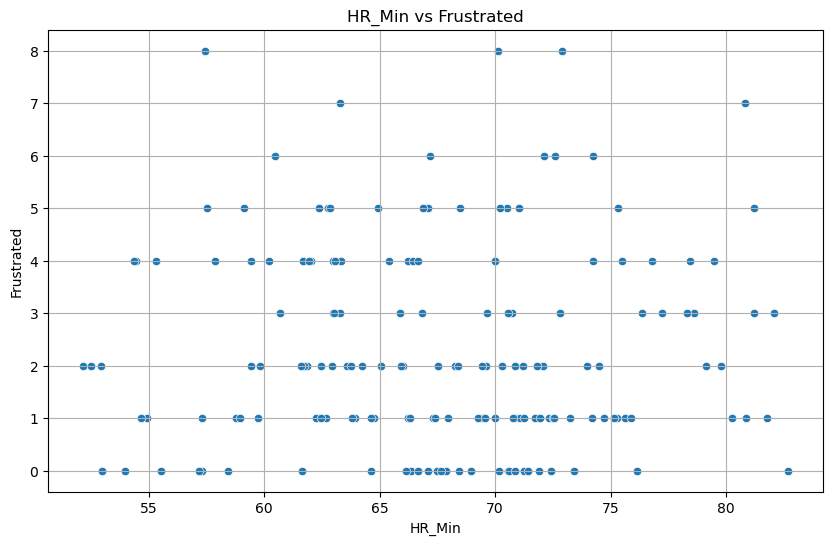

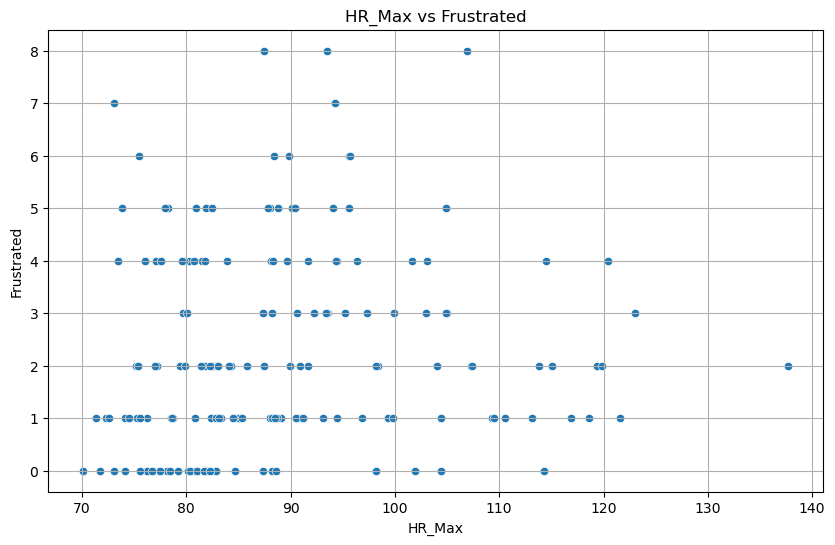

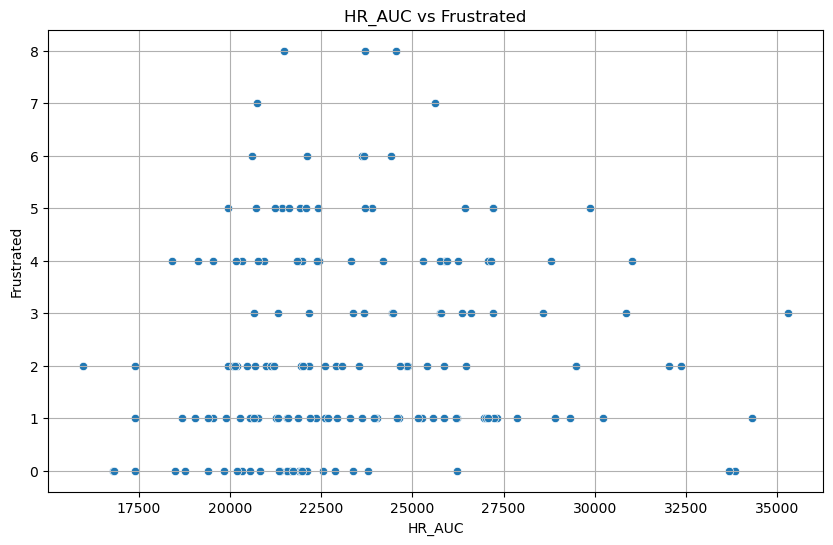

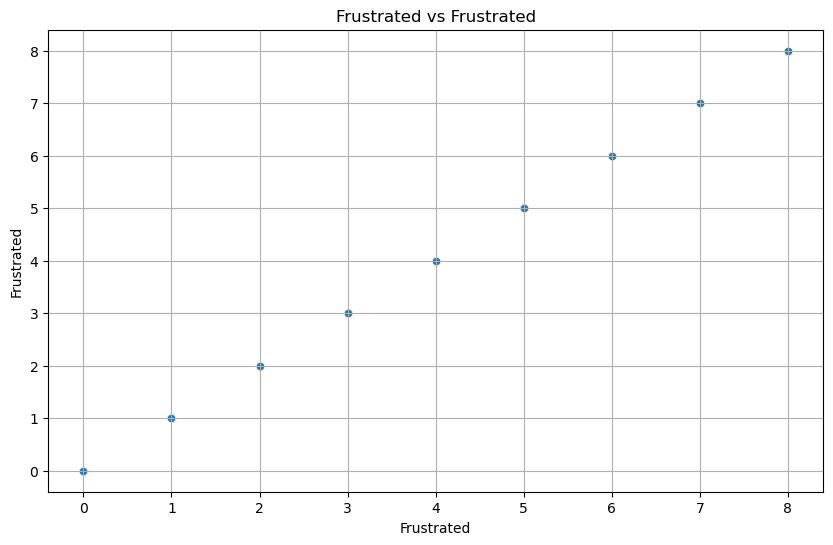

In [76]:
# Plotting correlations to check relationships
df_cleaned = df.drop(columns=['Individual', 'Cohort', "Unnamed: 0", "Round", "Phase", "Puzzler"])

plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

for col in df_cleaned.columns:
    # Plotting every variable against 'Frustrated'. Scatter
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_cleaned[col], y=df_cleaned['Frustrated'])
    plt.title(f'{col} vs Frustrated')
    plt.xlabel(col)
    plt.ylabel('Frustrated')
    plt.grid()
    plt.show()

In [77]:
# Splitting data based on Individuals
individuals = df['Individual'].unique()
lst = []

for individual in individuals:
    individual_data = df[df['Individual'] == individual]
    lst.append(individual_data)

lst[10]

,Unnamed: 0,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort
120,120,75.626667,75.070,2.864190,70.85,82.33,21932.160,round_3,phase3,11,0,0,D1_2
121,121,90.656346,88.770,7.506066,81.22,104.88,27205.500,round_3,phase2,11,0,3,D1_2
122,122,73.793345,74.470,2.423965,64.61,76.22,21552.095,round_3,phase1,11,0,1,D1_2
123,123,74.003633,73.100,2.123653,71.88,78.67,21310.810,round_2,phase3,11,0,1,D1_2
124,124,84.186327,86.025,5.783987,72.08,90.95,24671.860,round_2,phase2,11,0,2,D1_2
125,125,78.219107,77.420,2.675741,75.62,85.35,22682.600,round_2,phase1,11,0,1,D1_2
126,126,73.157196,73.290,1.527687,70.77,75.62,21580.835,round_4,phase3,11,0,1,D1_2
127,127,81.026075,80.530,2.746819,77.22,88.18,23661.895,round_4,phase2,11,0,3,D1_2
128,128,75.764983,72.500,9.898007,58.45,98.18,21980.060,round_4,phase1,11,0,0,D1_2
129,129,76.176379,76.555,2.290988,71.82,83.02,22011.700,round_1,phase3,11,0,2,D1_2


In [78]:
# Creating the cross validation data.
# Goal: Data splits by individuals. And Cohorts must be stratefied.
# Approach: 
# Compress data by individuals into single rows (Can later be expande via original data).
# The new problem becomes, to split the data by cohorts, using stratified sampling.

# Creating the compressed data list. Only consists of individual value and cohort.
compressed_data = []
for individual in individuals:
    individual_data = df[df['Individual'] == individual]
    cohort = individual_data['Cohort'].iloc[0]  # Assuming all rows for an individual have the same cohort
    compressed_data.append({'Individual': individual, 'Cohort': cohort})
compressed_df = pd.DataFrame(compressed_data)
compressed_df


,Individual,Cohort
0,1,D1_1
1,2,D1_1
2,3,D1_1
3,4,D1_1
4,5,D1_1
5,6,D1_1
6,7,D1_1
7,8,D1_1
8,9,D1_2
9,10,D1_2


In [79]:
# Preprocessing. Converting categorical variables "round", "Cohort", "Phase" to hot encoded variables.

# Round
round_dummies = pd.get_dummies(df['Round'])
# df = pd.concat([df, round_dummies], axis=1)
# df.drop('Round', axis=1, inplace=True)
# Cohort
cohort_dummies = pd.get_dummies(df['Cohort'])
# Phase
phase_dummies = pd.get_dummies(df['Phase'])

# Concatenating the dummies to the original dataframe
df_encoded = pd.concat([df, round_dummies, cohort_dummies, phase_dummies], axis=1)
df_encoded.drop(['Round', 'Cohort', 'Phase'], axis=1, inplace=True)
df_encoded

,Unnamed: 0,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Individual,Puzzler,Frustrated,round_1,round_2,round_3,round_4,D1_1,D1_2,phase1,phase2,phase3
0,0,77.965186,78.000,3.345290,73.23,83.37,22924.945,1,1,1,False,False,True,False,True,False,False,False,True
1,1,70.981097,70.570,2.517879,67.12,78.22,21930.400,1,1,5,False,False,True,False,True,False,False,True,False
2,2,73.371959,73.360,3.259569,67.88,80.22,21647.085,1,1,0,False,False,True,False,True,False,True,False,False
3,3,78.916822,77.880,4.054595,72.32,84.92,25258.905,1,1,1,False,True,False,False,True,False,False,False,True
4,4,77.322226,74.550,6.047603,70.52,90.15,23890.565,1,1,5,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,73.594539,72.380,9.474556,57.43,93.53,21482.985,14,0,8,False,False,False,True,False,True,False,True,False
164,164,57.839897,54.130,6.796647,52.97,74.14,16825.740,14,0,0,False,False,False,True,False,True,True,False,False
165,165,64.237295,65.195,3.589241,58.97,72.63,18691.065,14,0,1,True,False,False,False,False,True,False,False,True
166,166,70.834320,70.440,2.391160,66.65,76.07,20753.005,14,0,4,True,False,False,False,False,True,False,True,False


In [80]:
from  sklearn.model_selection import StratifiedKFold

skf =  StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in skf.split(compressed_df, compressed_df['Cohort']):
    """ Data """
    # Indexes
    print("Train Index:", train_index)
    print("Test Index:", test_index)

Train Index: [ 1  3  4  5  6  7  8 10 11 12 13]
Test Index: [0 2 9]
Train Index: [ 0  1  2  3  5  7  8  9 10 11 12]
Test Index: [ 4  6 13]
Train Index: [ 0  2  3  4  6  7  8  9 10 11 13]
Test Index: [ 1  5 12]
Train Index: [ 0  1  2  3  4  5  6  8  9 12 13]
Test Index: [ 7 10 11]
Train Index: [ 0  1  2  4  5  6  7  9 10 11 12 13]
Test Index: [3 8]


In [81]:
# Log feature transformations of HR_std and HR_Max. Adding instead of replacing.
df['HR_std_log'] = np.log1p(df['HR_std'])
df['HR_Max_log'] = np.log1p(df['HR_Max'])
df

,Unnamed: 0,HR_Mean,HR_Median,HR_std,HR_Min,HR_Max,HR_AUC,Round,Phase,Individual,Puzzler,Frustrated,Cohort,HR_std_log,HR_Max_log
0,0,77.965186,78.000,3.345290,73.23,83.37,22924.945,round_3,phase3,1,1,1,D1_1,1.469093,4.435212
1,1,70.981097,70.570,2.517879,67.12,78.22,21930.400,round_3,phase2,1,1,5,D1_1,1.257858,4.372229
2,2,73.371959,73.360,3.259569,67.88,80.22,21647.085,round_3,phase1,1,1,0,D1_1,1.449168,4.397162
3,3,78.916822,77.880,4.054595,72.32,84.92,25258.905,round_2,phase3,1,1,1,D1_1,1.620298,4.453417
4,4,77.322226,74.550,6.047603,70.52,90.15,23890.565,round_2,phase2,1,1,5,D1_1,1.952688,4.512507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,163,73.594539,72.380,9.474556,57.43,93.53,21482.985,round_4,phase2,14,0,8,D1_2,2.348949,4.548917
164,164,57.839897,54.130,6.796647,52.97,74.14,16825.740,round_4,phase1,14,0,0,D1_2,2.053694,4.319353
165,165,64.237295,65.195,3.589241,58.97,72.63,18691.065,round_1,phase3,14,0,1,D1_2,1.523715,4.299053
166,166,70.834320,70.440,2.391160,66.65,76.07,20753.005,round_1,phase2,14,0,4,D1_2,1.221172,4.344714


In [82]:
from  sklearn.model_selection import StratifiedKFold

skf =  StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

nn_mse_scores = []
rf_mse_scores = []
nn_loss = []
nn_gen = []
epochs = 400
ratio = 10

for train_index, test_index in skf.split(compressed_df, compressed_df['Cohort']):
    """ Data """
    # Indexes
    print("Train Index:", train_index)
    print("Test Index:", test_index)

    # Finding the original data for the train and test indexes. Mapping back to the original data.
    train_data = df[df['Individual'].isin(compressed_df.iloc[train_index]['Individual'])]
    test_data = df[df['Individual'].isin(compressed_df.iloc[test_index]['Individual'])]

    print("Train Data Shape:", train_data.shape)
    
    # As the models need input data X and target data y, we need to separate them.
    train_data_y = train_data['Frustrated']
    train_data_X = train_data.drop(columns=['Individual', 'Cohort', 'Frustrated', "Unnamed: 0", "Round", "Phase", "Puzzler"])
    # Standardizing the data
    train_data_X = (train_data_X - train_data_X.mean()) / train_data_X.std()
    print("Train Data X:")
    print(train_data_X.columns)

    # And for test data
    test_data_y = test_data['Frustrated']
    test_data_X = test_data.drop(columns=['Individual', 'Cohort', 'Frustrated', "Unnamed: 0", "Round", "Phase", "Puzzler"])
    # Standardizing the data
    test_data_X = (test_data_X - test_data_X.mean()) / test_data_X.std()
    # print("Testing standardization:")
    # print(test_data_X.mean())
    print("Test Data X:")
    print(test_data_X.columns)
    

    """ Training the model """
    # ANN
    import torch
    # Define a simple two-layer neural network using Sequential
    model = torch.nn.Sequential(
        torch.nn.Linear(train_data_X.shape[1], 32),
        torch.nn.ReLU(),
        torch.nn.Linear(32, 1),  # No activation (linear output)
    )

    # Prepare data
    X_train_tensor = torch.tensor(train_data_X.values, dtype=torch.float32)
    y_train_tensor = torch.tensor(train_data_y.values, dtype=torch.float32).view(-1, 1)

    # Loss and optimizer
    criterion = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
    nn_loss.append([])
    nn_gen.append([])

    # Training loop
    epochs = epochs
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        if (epoch+1) % ratio == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
            nn_loss[-1].append(loss.item())
            # Predictions
            model.eval()
            with torch.no_grad():
                X_test_tensor = torch.tensor(test_data_X.values, dtype=torch.float32)
                predictions = model(X_test_tensor)
                predictions = predictions.numpy().flatten()
                nn_gen[-1].append(mean_squared_error(test_data_y, predictions))



    # Predictions
    model.eval()
    with torch.no_grad():
        X_test_tensor = torch.tensor(test_data_X.values, dtype=torch.float32)
        predictions = model(X_test_tensor)
        predictions = predictions.numpy().flatten()


    # Random forest
    from sklearn.ensemble import RandomForestRegressor
    rf_model = RandomForestRegressor(n_estimators=100)
    rf_model.fit(train_data_X, train_data_y)
    # Predictions
    rf_predictions = rf_model.predict(test_data_X)
    # display(rf_predictions)
    # display(rf_predictions.shape)
    # display(train_data_y)
    # display(test_data_y.shape)
    

    # Comparing the predictions
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

    nn_mse = mean_squared_error(test_data_y, predictions)
    rf_mse = mean_squared_error(test_data_y, rf_predictions)
    # Collect these for each fold, then compare statistically
    print(f'Neural Network MSE: {nn_mse:.4f}')
    print(f'Random Forest MSE: {rf_mse:.4f}')
    nn_mse_scores.append(nn_mse)
    rf_mse_scores.append(rf_mse)

plt.show()



Train Index: [ 1  3  4  5  6  7  8 10 11 12 13]
Test Index: [0 2 9]
Train Data Shape: (132, 15)
Train Data X:
Index(['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC',
       'HR_std_log', 'HR_Max_log'],
      dtype='object')
Test Data X:
Index(['HR_Mean', 'HR_Median', 'HR_std', 'HR_Min', 'HR_Max', 'HR_AUC',
       'HR_std_log', 'HR_Max_log'],
      dtype='object')
Epoch [10/400], Loss: 9.3012
Epoch [20/400], Loss: 8.7185
Epoch [30/400], Loss: 8.1869
Epoch [40/400], Loss: 7.7033
Epoch [50/400], Loss: 7.2654
Epoch [60/400], Loss: 6.8724
Epoch [70/400], Loss: 6.5246
Epoch [80/400], Loss: 6.2210
Epoch [90/400], Loss: 5.9563
Epoch [100/400], Loss: 5.7263
Epoch [110/400], Loss: 5.5287
Epoch [120/400], Loss: 5.3613
Epoch [130/400], Loss: 5.2207
Epoch [140/400], Loss: 5.1031
Epoch [150/400], Loss: 5.0062
Epoch [160/400], Loss: 4.9254
Epoch [170/400], Loss: 4.8572
Epoch [180/400], Loss: 4.7953
Epoch [190/400], Loss: 4.7372
Epoch [200/400], Loss: 4.6811
Epoch [210/400], Loss: 4.626

In [83]:
nn_mse_scores,  rf_mse_scores

([3.266096353530884,
  5.0526814460754395,
  4.557334899902344,
  3.040764093399048,
  4.979870796203613],
 [3.3682813402777785,
  5.905527691358024,
  4.395432864197531,
  3.781705555555556,
  5.807354166666666])

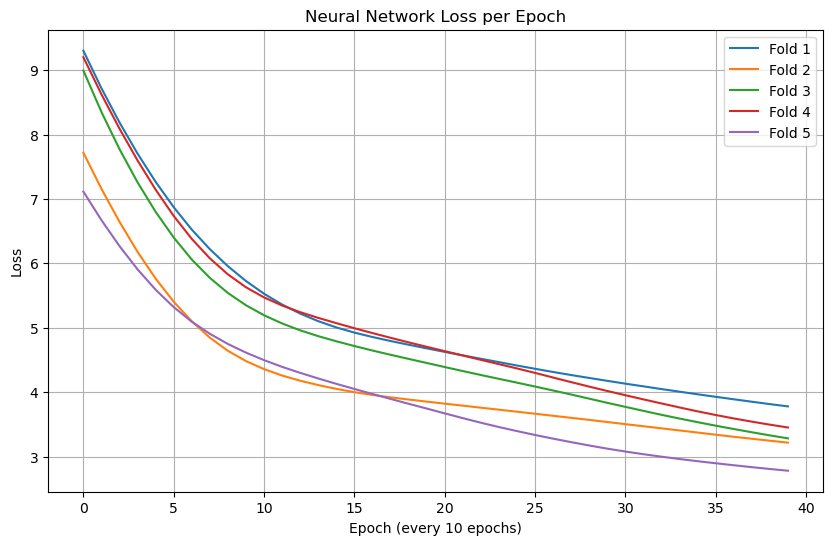

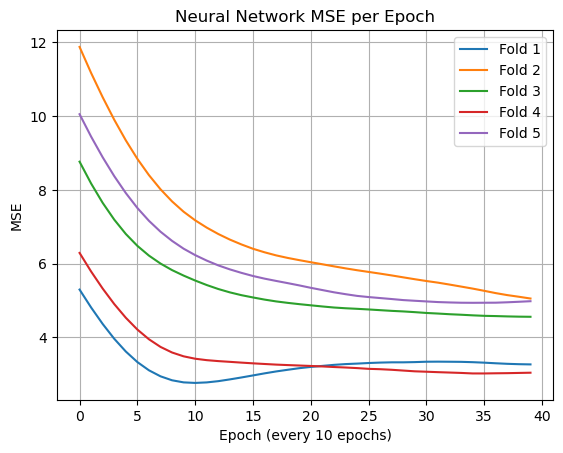

In [84]:
""" Descriptions of the results:"""
# Plotting the loss for the neural network
plt.figure(figsize=(10, 6))

# Removing outliers from the loss values for better visualization
# nn_loss = [[None if num > 100 else num for num in loop] for loop in nn_loss]

for i, loss in enumerate(nn_loss):
    plt.plot(loss, label=f'Fold {i+1}')
    plt.title('Neural Network Loss per Epoch')
    plt.xlabel(f"Epoch (every {ratio} epochs)")
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

plt.show()

for i,  gen in enumerate(nn_gen):
    plt.plot(gen, label=f'Fold {i+1}')
    plt.title('Neural Network MSE per Epoch')
    plt.xlabel(f"Epoch (every {ratio} epochs)")
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()

Text(0, 0.5, 'Mean Squared Error')

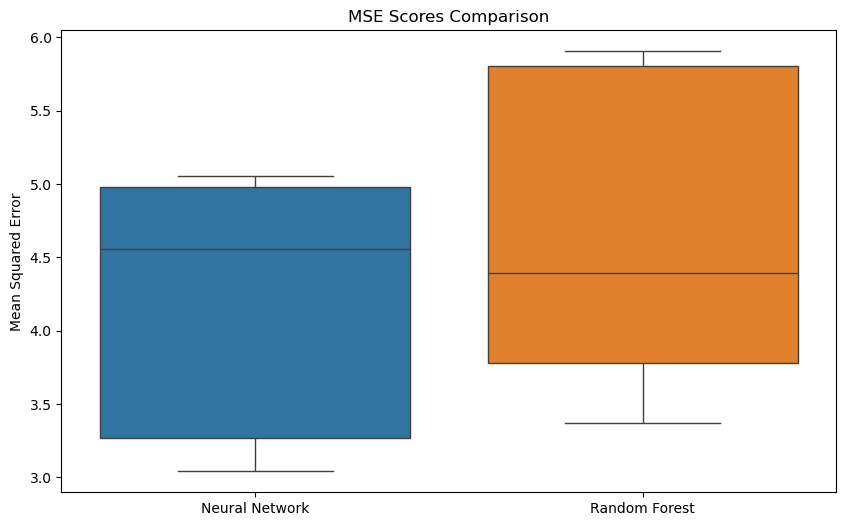

In [85]:
# Box plots of  the MSE scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=[nn_mse_scores, rf_mse_scores])
plt.xticks([0, 1], ['Neural Network', 'Random Forest'])
plt.title('MSE Scores Comparison')
plt.ylabel('Mean Squared Error')


In [86]:
# Variance and descriptive statistics
nn_mse_scores = np.array(nn_mse_scores)
rf_mse_scores = np.array(rf_mse_scores)
print(f'Neural Network MSE Variance: {np.var(nn_mse_scores):.4f}')
print(f'Random Forest MSE Variance: {np.var(rf_mse_scores):.4f}')
print(f'Neural Network MSE Mean: {np.mean(nn_mse_scores):.4f}')
print(f'Random Forest MSE Mean: {np.mean(rf_mse_scores):.4f}')

Neural Network MSE Variance: 0.7354
Random Forest MSE Variance: 1.0755
Neural Network MSE Mean: 4.1793
Random Forest MSE Mean: 4.6517


In [91]:
# One table to rule them all. Display models as rows and raw fold MSE scores, mean, variance as columns.
results_df = pd.DataFrame({
    'Model': ['Neural Network', 'Random Forest'],
    'Fold 1 MSE': [nn_mse_scores[0], rf_mse_scores[0]],
    'Fold 2 MSE': [nn_mse_scores[1], rf_mse_scores[1]],
    'Fold 3 MSE': [nn_mse_scores[2], rf_mse_scores[2]],
    'Fold 4 MSE': [nn_mse_scores[3], rf_mse_scores[3]],
    'Fold 5 MSE': [nn_mse_scores[4], rf_mse_scores[4]],
    'Mean MSE': [np.mean(nn_mse_scores), np.mean(rf_mse_scores)],
    'Variance MSE': [np.var(nn_mse_scores), np.var(rf_mse_scores)]
})
print(results_df.round(2).to_latex())

\begin{tabular}{llrrrrrrr}
\toprule
 & Model & Fold 1 MSE & Fold 2 MSE & Fold 3 MSE & Fold 4 MSE & Fold 5 MSE & Mean MSE & Variance MSE \\
\midrule
0 & Neural Network & 3.270000 & 5.050000 & 4.560000 & 3.040000 & 4.980000 & 4.180000 & 0.740000 \\
1 & Random Forest & 3.370000 & 5.910000 & 4.400000 & 3.780000 & 5.810000 & 4.650000 & 1.080000 \\
\bottomrule
\end{tabular}



In [92]:
""" Testing the models"""
# Wilcoxon signed-rank test for paired samples (MSEs from each fold)
from scipy.stats import wilcoxon

stat, p = wilcoxon(nn_mse_scores, rf_mse_scores)
print(f'Wilcoxon signed-rank test: statistic={stat:.4f}, p-value={p:.4f}')

if p < 0.05:
    print('There is a statistically significant difference between the models.')
else:
    print('No statistically significant difference between the models.')

Wilcoxon signed-rank test: statistic=2.0000, p-value=0.1875
No statistically significant difference between the models.


In [89]:
from scipy.stats import ttest_rel

t_stat, t_p = ttest_rel(nn_mse_scores, rf_mse_scores)
print(f'Paired t-test: t-statistic={t_stat:.4f}, p-value={t_p:.4f}')

if t_p < 0.05:
    print('There is a statistically significant difference between the models.')
else:
    print('No statistically significant difference between the models.')

Paired t-test: t-statistic=-2.2487, p-value=0.0878
No statistically significant difference between the models.
